# Matplotlib Formatting charts

mostly bar

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

df = pd.read_csv("C:/Users/DELL/Downloads/data_jobs.csv")
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [24]:
df_exploded = df.explode('job_skills')
job_title_skills = df_exploded.groupby(['job_title_short', 'job_skills']).size()
job_title_skills = job_title_skills.reset_index(name='skill_count')
job_title_skills = job_title_skills.sort_values('skill_count', ascending=False)


In [25]:
job_title_skills.head()

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982


In [26]:
job_lists = ['Data Analyst', 'Data Scientist', 'Data Engineer']

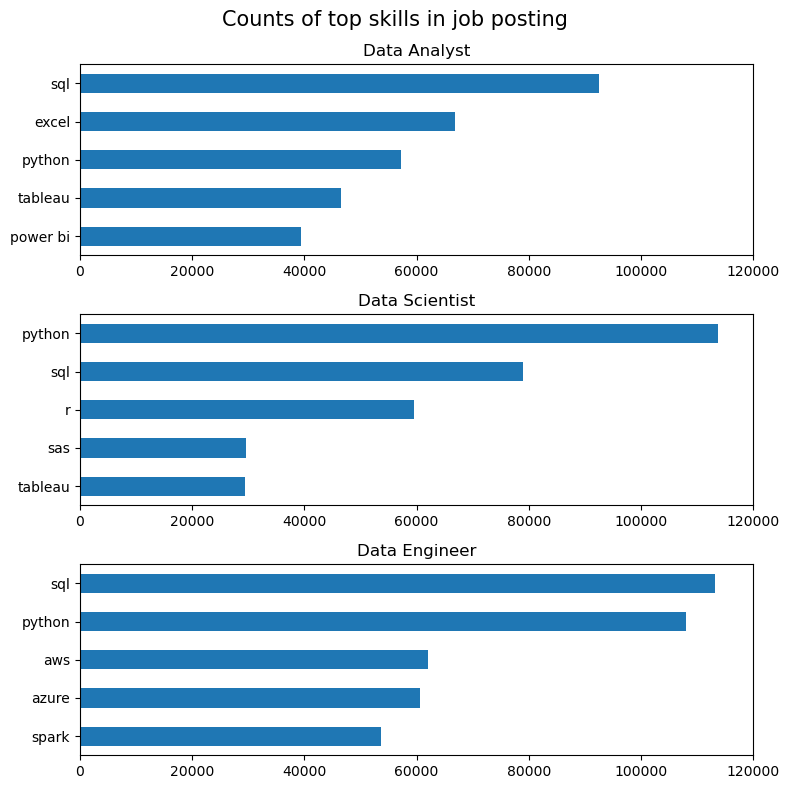

In [40]:
fig, ax = plt.subplots(3, 1, figsize=(8,8))

for i, job_tit in enumerate(job_lists):
    df_job_counts = job_title_skills[job_title_skills['job_title_short']==job_tit].head(5)
    df_job_counts.plot(kind='barh', x='job_skills',  y='skill_count',ax=ax[i], title=job_tit)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of top skills in job posting', fontsize=15)
fig.tight_layout()
